In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\swapn\AppData\Local\Temp\ipykernel_9200\799881091.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("C:/Users/swapn/Downloads/Student Performance Indicator/notebook/data/StudentsPerformance.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [24]:
print("Gender:")
print(df['gender'].unique(),"\n")

print("race/ethnicity:")
print(df['race/ethnicity'].unique(),"\n")

print("parental level of education:")
print(df['parental level of education'].unique(),"\n")

print("lunch:")
print(df['lunch'].unique(),"\n")

print("test preparation course:")
print(df['test preparation course'].unique(),"\n")



Gender:
['female' 'male'] 

race/ethnicity:
['group B' 'group C' 'group A' 'group D' 'group E'] 

parental level of education:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

lunch:
['standard' 'free/reduced'] 

test preparation course:
['none' 'completed'] 



In [25]:
numerical = df.select_dtypes(include=['int64'])
categorical = df.select_dtypes(include=['object'])
numerical.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [26]:
categorical.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [27]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [35]:
reading_full = df[df['reading score'] == 100]['average score'].count()
writing_full = df[df['writing score'] == 100]['average score'].count()
math_full = df[df['math score'] == 100]['average score'].count()
print(reading_full)
print(writing_full)
print(math_full)

17
14
7


In [36]:
reading_full = df[df['reading score'] <= 20]['average score'].count()
writing_full = df[df['writing score'] <= 20]['average score'].count()
math_full = df[df['math score'] <= 20]['average score'].count()
print(reading_full)
print(writing_full)
print(math_full)

1
3
4


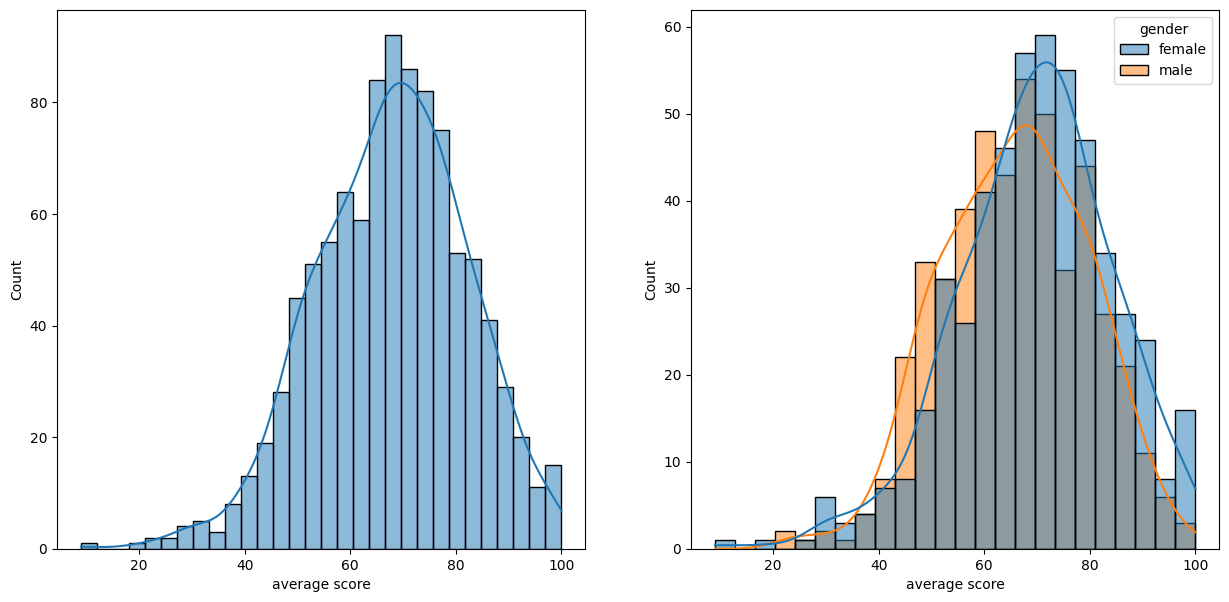

In [45]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = df, x = 'average score', bins = 30, kde = True)
plt.subplot(122)
sns.histplot(data = df, x = 'average score', kde = True, hue = 'gender')
plt.show()

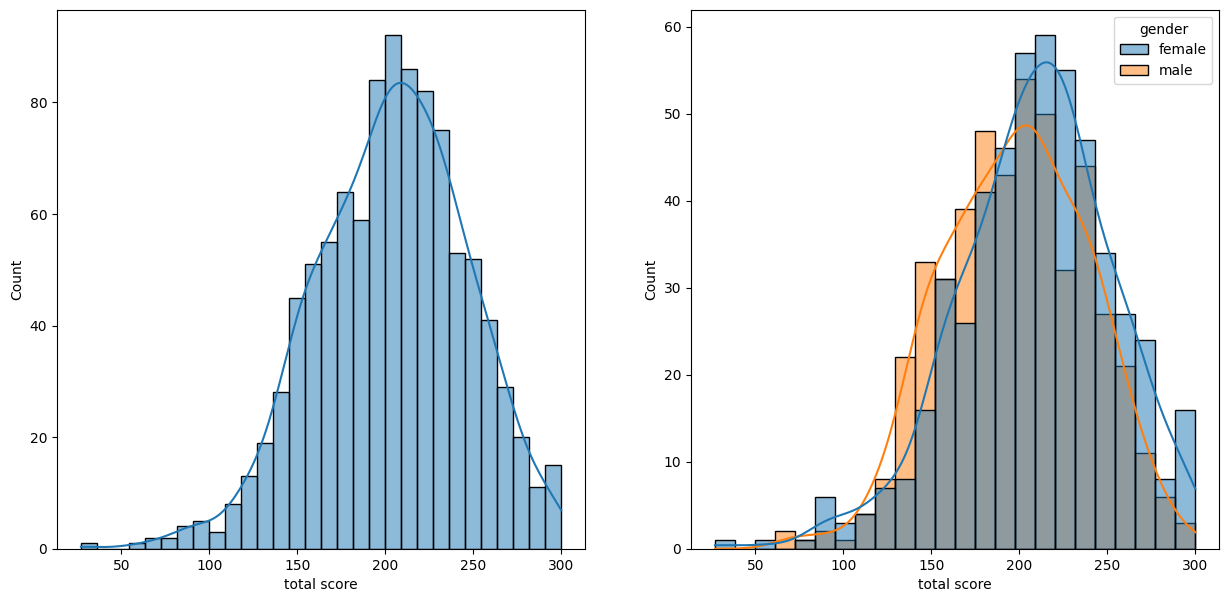

In [46]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = df, x = 'total score', bins = 30, kde = True)
plt.subplot(122)
sns.histplot(data = df, x = 'total score', kde = True, hue = 'gender')
plt.show()

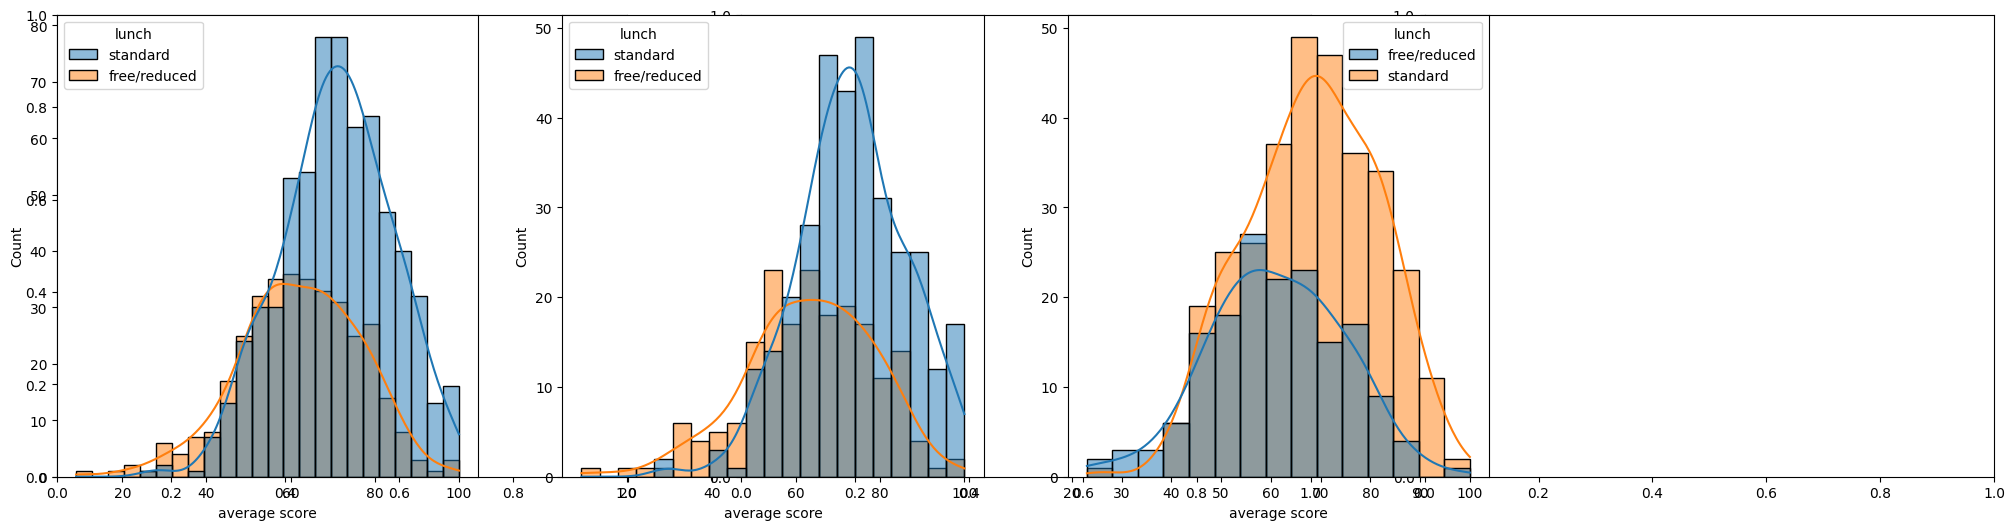

In [47]:
plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(141)
sns.histplot(data = df, x = 'average score', kde = True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'], x = 'average score', kde = True, hue = 'lunch')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'], x = 'average score', kde = True, hue = 'lunch')
plt.show()

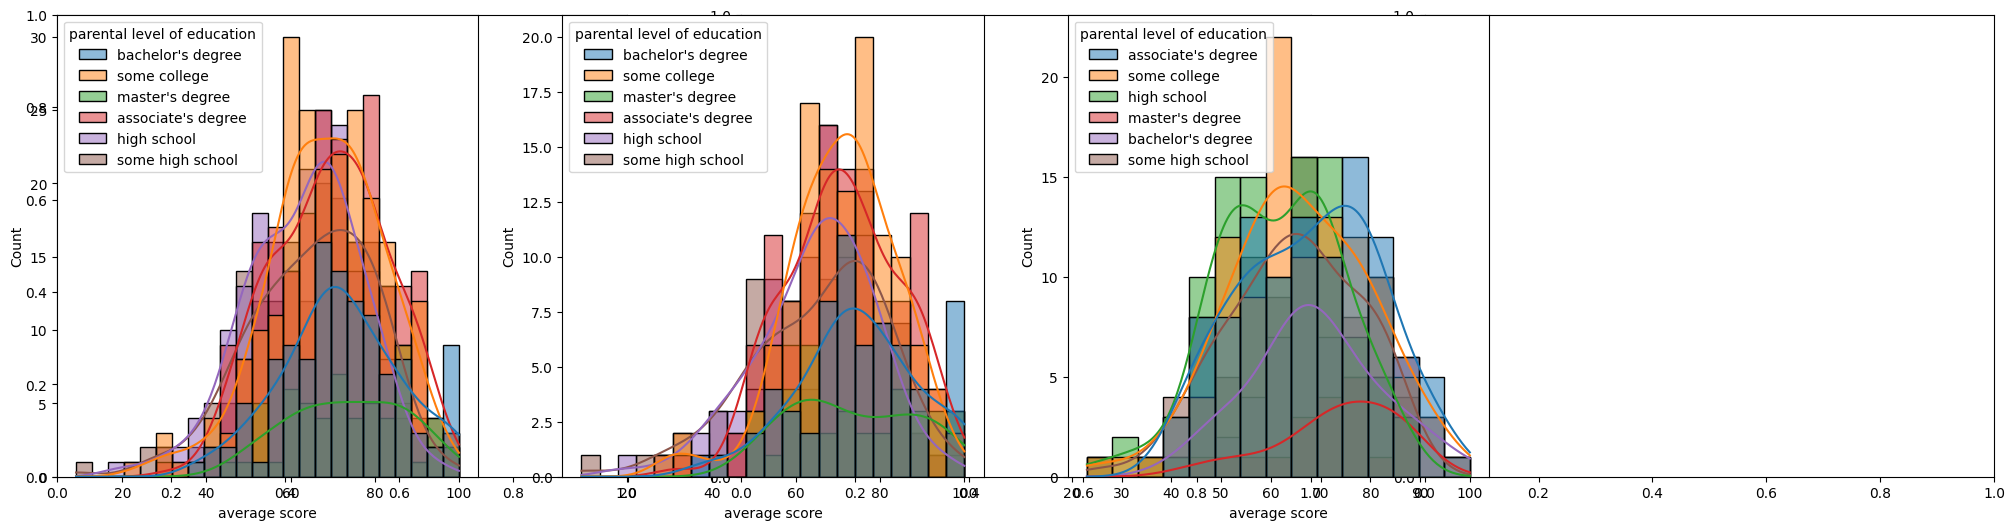

In [48]:
plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(141)
sns.histplot(data = df, x = 'average score', kde = True, hue = 'parental level of education')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'], x = 'average score', kde = True, hue = 'parental level of education')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'], x = 'average score', kde = True, hue = 'parental level of education')
plt.show()

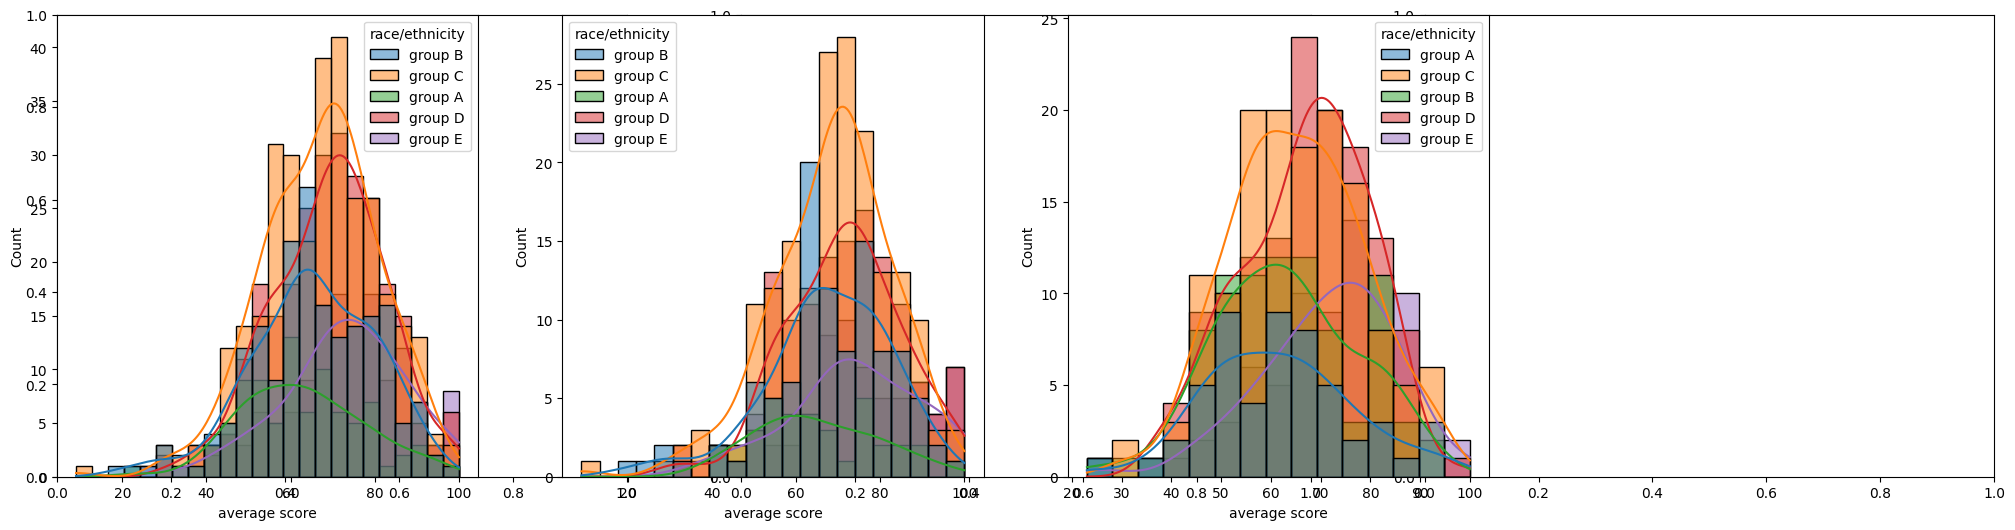

In [49]:
plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(141)
sns.histplot(data = df, x = 'average score', kde = True, hue = 'race/ethnicity')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'], x = 'average score', kde = True, hue = 'race/ethnicity')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'], x = 'average score', kde = True, hue = 'race/ethnicity')
plt.show()

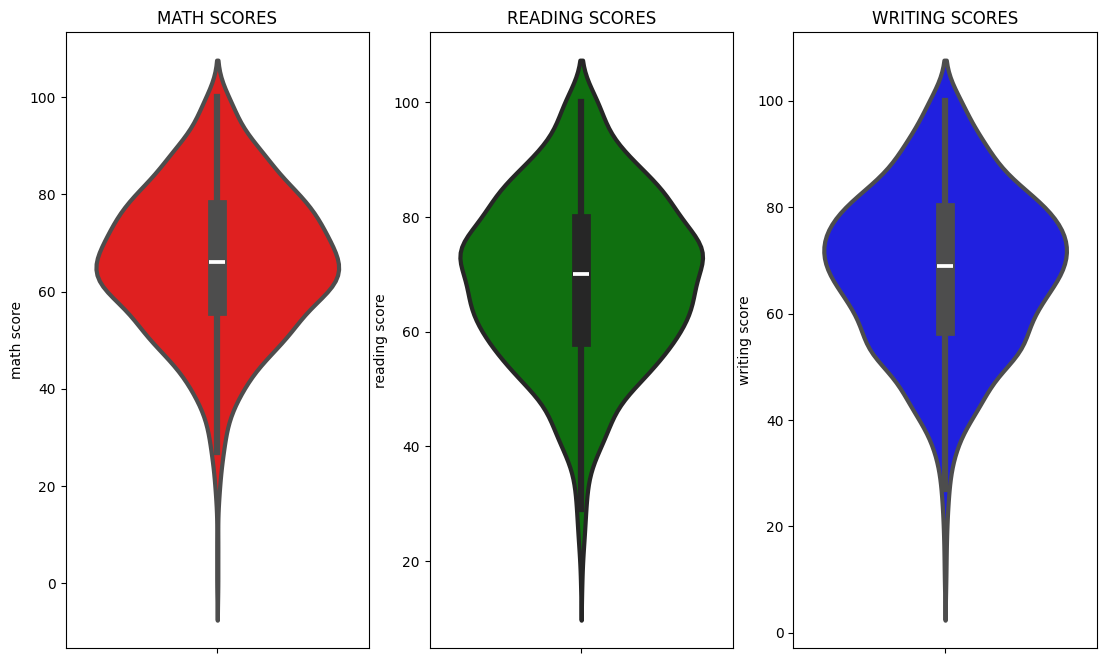

In [50]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

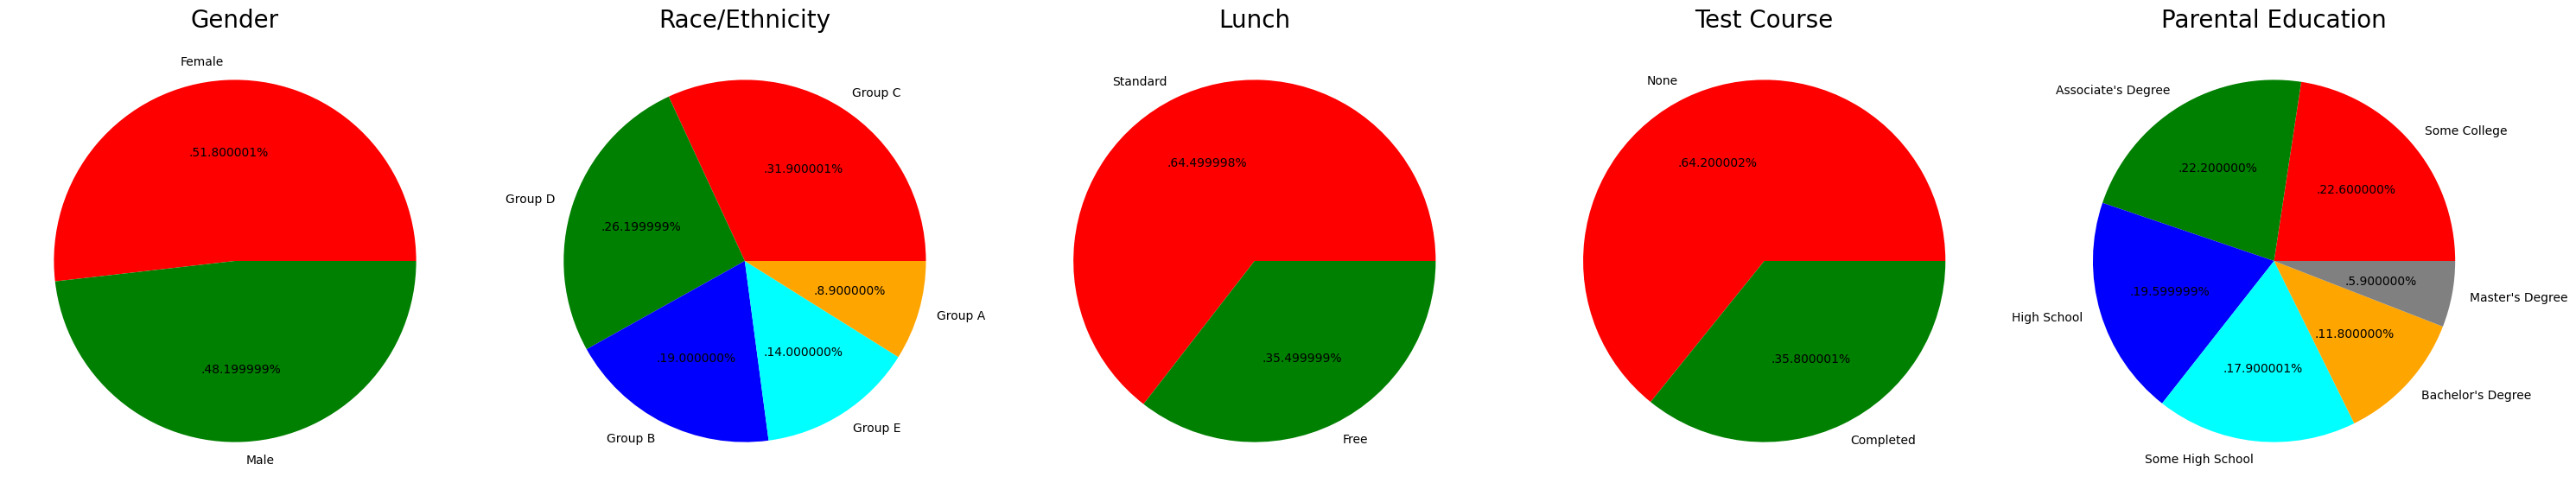

In [51]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

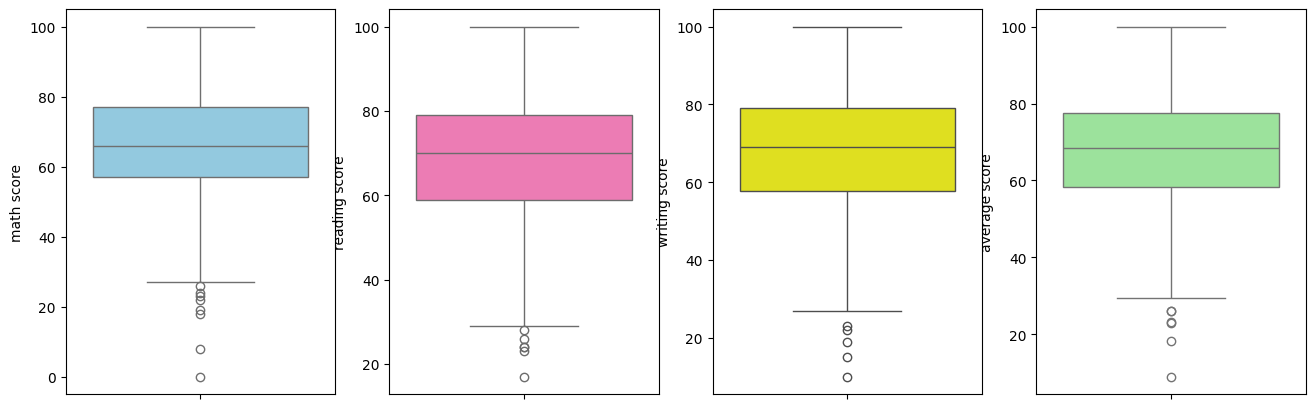

In [58]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average score'],color='lightgreen')
plt.show()